In [288]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

plt.rcParams["figure.figsize"]=10,8

In [289]:
symp_weight_df = pd.read_csv('../symptom_severity.csv')

df = pd.read_csv('../disease_symptoms_weight.csv')
df.rename(columns={"Unnamed: 0":"index1"},inplace=True)
df.set_index("index1", inplace=True)
df.set_index("Disease", inplace=True)
# disease_col = df.pop('Disease')
# df.insert(0, 'Disease',disease_col)
# df.set_index("Disease")


In [290]:
symp_weight_df["Symptom"].drop_duplicates(inplace=True)


In [291]:
symp_weight_df.set_index("Symptom",inplace=True)
symp_weight_df.sort_index(inplace=True)
symp_weight_df

,weight
Symptom,
abdominal_pain,4
abnormal_menstruation,6
acidity,3
acute_liver_failure,6
altered_sensorium,2
...,...
weight_loss,3
yellow_crust_ooze,3
yellow_urine,4


In [292]:
data_sm = df.iloc[:,1:-1]
label_sm = df.loc[:, 'normalised_mean']
data_sm

,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
Disease,,,,,,,,,,,,,,,,,,,,,
(vertigo) paroymsal positional vertigo,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
(vertigo) paroymsal positional vertigo,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
(vertigo) paroymsal positional vertigo,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
(vertigo) paroymsal positional vertigo,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
(vertigo) paroymsal positional vertigo,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hepatitis a,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,4,3
hepatitis a,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,4,3
hepatitis a,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,4,3


##### Decision Tree regressor

In [293]:
from sklearn.tree import DecisionTreeRegressor

In [294]:
model = DecisionTreeRegressor()

In [295]:
x_train,x_test,y_train,y_test = train_test_split(data_sm,label_sm,test_size=0.2,shuffle=True)

In [296]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [297]:
prediction = model.predict(x_test)

In [298]:
dtr_r2 = r2_score(y_test, prediction) * 100
dtr_mas = mean_squared_error(y_test, prediction)
dtr_evs=explained_variance_score(y_test,prediction)
print('Decision Tree Regressor, R2-score \t\t\t= ',dtr_r2)
print('Decision Tree Regressor, Mean-Squared-Error \t\t= ',dtr_mas )
print('Decision Tree Regressor, Explained-variance-Score \t= ',dtr_evs)

Decision Tree Regressor, R2-score 			=  99.9934799313802
Decision Tree Regressor, Mean-Squared-Error 		=  2.749755077924316e-05
Decision Tree Regressor, Explained-variance-Score 	=  0.999935011308791


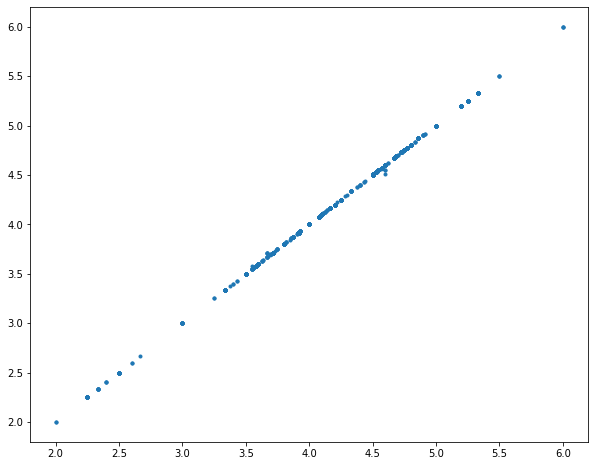

In [299]:
plt.scatter(y_test,prediction,marker=".")

## irl test

In [300]:
sympts=df.iloc[:,1:-1].columns.tolist()
sympts[43]

'headache'

In [301]:
def weightadder(in_lst):

    input_symptoms = in_lst

    input_symptoms_list = []

    for s in sympts:
        if s in input_symptoms:
            weight = symp_weight_df.loc[s, "weight"]
            input_symptoms_list.append(weight)
        else:
            input_symptoms_list.append(0)

    return input_symptoms_list


In [302]:
# to_pre = weightadder(["unsteadiness", "spinning_movements", "headache"])
to_pre = weightadder(["runny_nose", "loss_of_smell", "mild_fever"])
print(to_pre)
# to_pre = pd.DataFrame(to_pre).transpose()
to_pre = pd.DataFrame(to_pre)
sy = to_pre.loc[to_pre[0]!=0]
to_pre = to_pre.transpose()
to_pre.columns=sympts

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [303]:
to_pre

,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
pred_nor_mean = model.predict(to_pre)[0]
print(pred_nor_mean)

4.4


In [305]:
ll=pred_nor_mean-0.15
ul=pred_nor_mean+0.15

In [306]:
print(sy.index)
sy=sy.index.tolist()

Int64Index([61, 63, 92], dtype='int64')


In [307]:
filt1 = ((df['normalised_mean'] > ll) & (df['normalised_mean'] < ul) & (df[sympts[sy[0]]] > 0))

filt2 = ((df['normalised_mean'] > ll) & (df['normalised_mean'] < ul))

df.loc[filt2,["normalised_mean"]].groupby("Disease").agg("mean").sort_values("normalised_mean")

,normalised_mean
Disease,
jaundice,4.285714
chicken pox,4.300000
allergy,4.333333
diabetes,4.333333
fungal infection,4.333333
hepatitis c,4.400000
malaria,4.428571
varicose veins,4.458333
peptic ulcer diseae,4.475000
